Loan Prediction Problem Dataset
Predict how much a person can loan from a bank

Kaggle link: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv

-> A lot of missing values
-> Lack of description

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import cut_the_tails as ct
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('data_sets\\loan_dataset.csv')
target = 'LoanAmount'

In [3]:
features = [
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status'
 ]

In [4]:
fig = px.histogram(df, x=target, nbins=40)
fig.show()

In [5]:
genders = ['Male', 'Female']
yesno = ["Yes", "No"]
grad = ['Graduate', 'Not Graduate']
prop = ["Urban", "Rural", 'Semiurban']
status = ["Y", "N"]

for i in genders:
    df['Gender'] = df['Gender'].replace(genders, genders.index(i)+1)

for i in yesno:
    df['Married'] = df['Married'].replace(yesno, yesno.index(i)+1)

for i in grad:
    df['Education'] = df['Education'].replace(grad, grad.index(i)+1)

for i in yesno:
    df['Self_Employed'] = df['Self_Employed'].replace(yesno, yesno.index(i)+1)

for i in prop:
    df['Property_Area'] = df['Property_Area'].replace(prop, prop.index(i)+1)

for i in status:
    df['Loan_Status'] = df['Loan_Status'].replace(status, status.index(i)+1)

df['Dependents'] = df['Dependents'].str.replace('+', '')


C:\Users\vini_\AppData\Local\Temp\ipykernel_6956\1092242487.py:25: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



# Cauda Ótima

[0.05, 0.95]


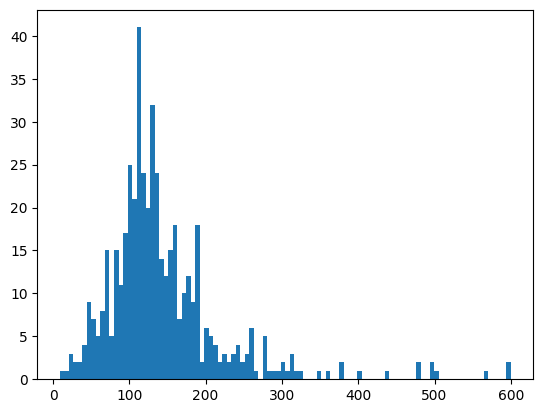

In [6]:
df.dropna(inplace=True)
df = df.reset_index()

model = DecisionTreeRegressor(random_state=0, max_depth=5) 
classifier = DecisionTreeClassifier(random_state=0, max_depth=5)

optimal = ct.get_optimal_percentiles(df, target, features, classifier, model, 'normal', 'brute-force', 2)

print(optimal)

In [110]:
cdf = ct.split_by_quantile_class(df,target,[0.115,0.285])

cdf.fillna(0, inplace=True)

c:\Users\vini_\Documents\GitHub\TailNotTail-Regression\cut_the_tails.py:125: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [111]:
X = cdf[features].to_numpy()
y_tail = cdf['tail_class'].to_numpy()
y = cdf[target].to_numpy()

In [112]:
#baseline = RandomForestRegressor(max_depth=4, random_state=0)
baseline = XGBRegressor(n_estimators=100, max_leaves=0, random_state = 0, max_depth=4)
#baseline = DecisionTreeRegressor(random_state=0, max_depth=4) 

In [113]:
#tail_classifier = ct.fit_tail_classifier(X,y_tail,RandomForestClassifier(max_depth=4, random_state=0))
tail_classifier = ct.fit_tail_classifier(X,y_tail,XGBClassifier(n_estimators=100, max_leaves=0, random_state = 0, max_depth=4))
#tail_classifier = ct.fit_tail_classifier(X,y_tail,DecisionTreeClassifier(random_state=0, max_depth=4)) 

In [114]:
models = ct.fit_tail_models(X,y,y_tail,baseline)

[20:00:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[20:00:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[20:00:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[20:00:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[20:00:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[20:00:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

In [115]:
baseline.fit(X,y)
y_base = baseline.predict(X)

y_tail = ct.batch_tail_predict(X,tail_classifier,models)

In [116]:
print(mean_absolute_error(y_base,y))
print(mean_absolute_error(y_tail,y))
print(mean_absolute_error(y,y))

14.909452655804662
14.909452655804662
0.0


In [117]:
print(mean_absolute_percentage_error(y_base,y))
print(mean_absolute_percentage_error(y_tail,y))
print(mean_absolute_percentage_error(y,y))

0.14232046629102188
0.14232046629102188
0.0
